In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models

In [45]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [46]:
train_images.shape

(50000, 32, 32, 3)

In [47]:
train_labels.shape

(50000, 1)

In [48]:
test_images.shape

(10000, 32, 32, 3)

In [49]:
test_labels.shape

(10000, 1)

In [50]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

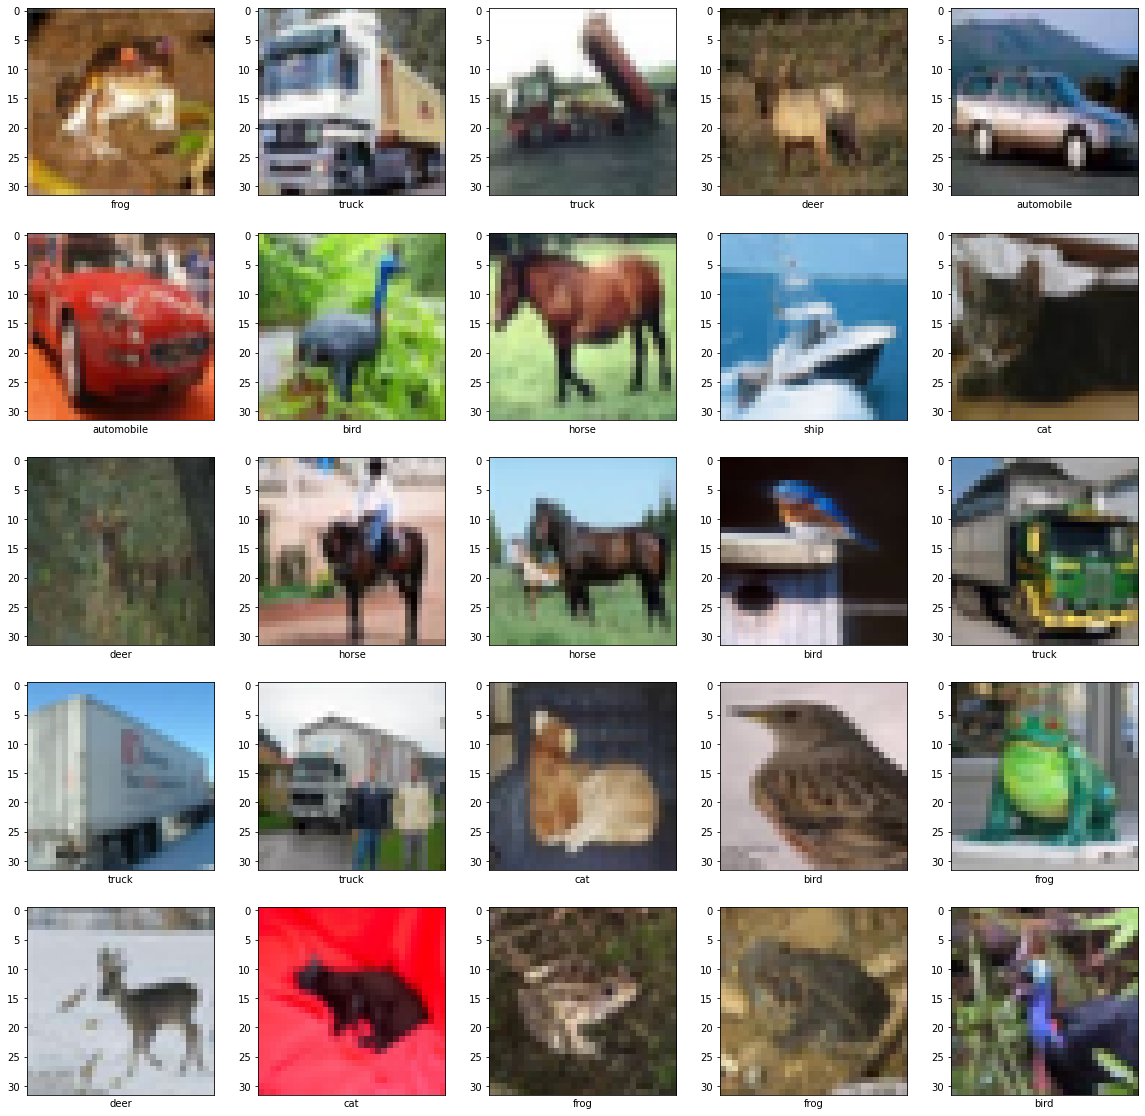

In [51]:
plt.figure(figsize=(20,20))

for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [52]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [53]:
train_images_normalize = train_images/255
test_images_normalize = test_images/255

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',padding = 'same',input_shape = (32,32,3)))
model.add(layers.Conv2D(32,(3,3),activation = 'relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(layers.Conv2D(64,(3,3),activation = 'relu',padding = 'same'))
model.add(layers.MaxPooling2D ((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(layers.Conv2D(128,(3,3),activation = 'relu',padding = 'same'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(128,activation = 'relu'))

model.add(layers.Dense(10,activation = 'softmax'))

In [55]:
model.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [56]:
history = model.fit(train_images_normalize,train_labels,batch_size=500,epochs=10,validation_data=(test_images_normalize,test_labels))

Epoch 1/10
100/100 [==============================] - 161s 2s/step - loss: 1.9139 - accuracy: 0.2894 - val_loss: 1.5910 - val_accuracy: 0.4079
Epoch 2/10
100/100 [==============================] - 143s 1s/step - loss: 1.4775 - accuracy: 0.4575 - val_loss: 1.3335 - val_accuracy: 0.5114
Epoch 3/10
100/100 [==============================] - 140s 1s/step - loss: 1.2945 - accuracy: 0.5288 - val_loss: 1.2235 - val_accuracy: 0.5550
Epoch 4/10
100/100 [==============================] - 153s 2s/step - loss: 1.1332 - accuracy: 0.5917 - val_loss: 1.2702 - val_accuracy: 0.5497
Epoch 5/10
100/100 [==============================] - 151s 2s/step - loss: 1.0296 - accuracy: 0.6344 - val_loss: 1.0134 - val_accuracy: 0.6382
Epoch 6/10
100/100 [==============================] - 148s 1s/step - loss: 0.9150 - accuracy: 0.6758 - val_loss: 0.9328 - val_accuracy: 0.6670
Epoch 7/10
100/100 [==============================] - 149s 1s/step - loss: 0.8328 - accuracy: 0.7046 - val_loss: 0.8922 - val_accuracy: 0.6796

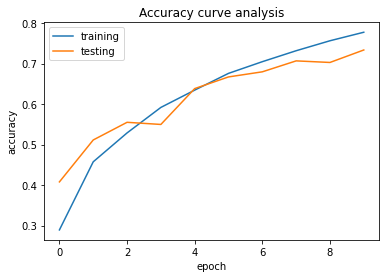

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy curve analysis')
plt.legend(['training','testing'],loc='best')

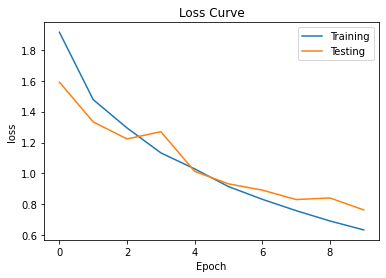

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title('Loss Curve')
plt.legend(['Training','Testing'],loc="best")